# 1) TD LEARNING

In [47]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [48]:
gamma = 0.6 # discounting rate
reward_size = -1
grid_size_x = 5
grid_size_y = 10
alpha = 0.5
wall_states = [[7, 4], [7, 3], [7, 2]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
num_iterations = 10000
episode_length = 100

In [49]:
# initialization
V = np.zeros((grid_size_x, grid_size_y))
print(V)
returns = {(i, j):list() for i in range(grid_size_x) for j in range(grid_size_y)}
deltas = {(i, j):list() for i in range(grid_size_x) for j in range(grid_size_y)}
print('deltas: ', deltas)
states = [[i, j] for i in range(grid_size_x) for j in range(grid_size_y)]
print('states: ', states)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
deltas:  {(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (0, 4): [], (0, 5): [], (0, 6): [], (0, 7): [], (0, 8): [], (0, 9): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (1, 4): [], (1, 5): [], (1, 6): [], (1, 7): [], (1, 8): [], (1, 9): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (2, 4): [], (2, 5): [], (2, 6): [], (2, 7): [], (2, 8): [], (2, 9): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): [], (3, 4): [], (3, 5): [], (3, 6): [], (3, 7): [], (3, 8): [], (3, 9): [], (4, 0): [], (4, 1): [], (4, 2): [], (4, 3): [], (4, 4): [], (4, 5): [], (4, 6): [], (4, 7): [], (4, 8): [], (4, 9): []}
states:  [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6]

In [50]:
# utils
def generate_initial_state():
    init_state = random.choice(states[1:-1])
    while init_state in wall_states:
        init_state = random.choice(states[1:-1])
    return init_state

def generate_next_action():
    return random.choice(actions)

def take_action(state, action):
    final_state = np.array(state)+np.array(action)
    
#     if (-1 in list(final_state) 
#     or grid_size_x in list(final_state) or grid_size_y in list(final_state) 
#     or list(final_state) in wall_states):
#         # this means that the robot doesn't move
#         # it stays in the same state that it was given
#         final_state = state
        
    if (-1 in list(final_state) 
    or grid_size_x in list(final_state) or grid_size_y in list(final_state)):
        # this means that the robot doesn't move
        # it stays in the same state that it was given
        final_state = state
    
    # this is the reward 20 state
    if (list(final_state) == [3, 9]):
        return 20, list(final_state) 
    
    if (list(final_state) in wall_states):
        return float(-inf), list(final_state)
        
    return reward_size, list(final_state)

In [53]:
for it in tqdm(range(num_iterations)):
    # episode starts at a random cell
    state = generate_initial_state()
    
    for _ in range(episode_length):
        action = generate_next_action()
        reward, final_state = take_action(state, action)
        
        if list(final_state) in wall_states:
            print('here')
            
        # modify value function
        before = V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[final_state[0], final_state[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        state = final_state

100%|████████████████████████████████████| 10000/10000 [00:19<00:00, 524.05it/s]


In [54]:
print(V)

[[-2.5        -2.5        -2.5        -2.5        -2.5        -2.49798927
  -2.49152007 -2.46403185 -2.28984483 -2.43063244]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.49301866
  -2.46897661 -2.24533402 -2.06618568 -2.35066527]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.45114621
  -2.4188437  -1.80338879 -2.12546475 -2.21509006]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.39057322
  -2.25794872 -1.29156453 12.06213735  1.9766072 ]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.46914313
  -2.34213254 -2.24290034  6.13376955 15.84930623]]


In [111]:
def visualize():
    plt.xlim(0, grid_size_x)
    plt.ylim(0, grid_size_y)
    plt.gca().invert_yaxis()
    plt.title("TD LEARNING")
    
    for state in states:
        value = float("{:.2f}".format(V[state[0]][state[1]]))
        plt.text(state[0], state[1], str(value), ha='left', va='center')
    
#     fig, ax = plt.subplots()
    
#     for (i, j), z in np.ndenumerate(V):
#         plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

# #     ax.matshow(V)

#     plt.show()

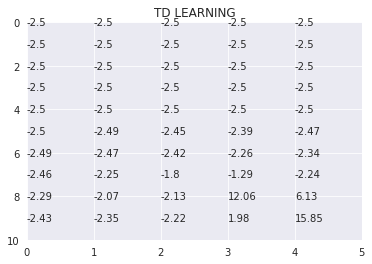

In [112]:
visualize()